
<label>TO DO Tasks</label>
<ul>
    <input type="checkbox"> Revisar títulos dos gráficos <br>
    <input type="checkbox"> Mudar comentários em portugues para comentarios em ingles <br>
    <input type="checkbox"> Adicionar textos de analises <br>
    <input type="checkbox"> Justificar todos os textos <br>
</ul>

***

# About Notebook
<p style='text-align: justify;'>The work of EDA (Exploratory Data Analysis) is essential in any data analysis study. This is because, before any type of modeling or inference is performed, it is necessary to deeply understand the data that will be used. EDA allows the researcher to get to know the characteristics of the data, such as its distribution, correlation between variables, presence of outliers, among other relevant aspects. With this information in hand, it is possible to make more accurate choices about the type of model to be used, necessary pre-processing, variable selection, and so on. </p>

<p style='text-align: justify;'>In addition, EDA can help identify data quality issues, such as inconsistencies, missing values, or measurement errors. By detecting these issues, they can be corrected, thus improving the quality of the analysis as a whole. </p>

<p style='text-align: justify;'>The main objective of this notebook is to apply the process of EDA, which records the salaries of professionals in the data career, interpreting them to present based on numbers and data.</p>

## EDA Steps
Example of steps in Exploratory Data Analysis

![EDA Steps](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process.png)

## About [ai-jobs.net](https://ai-jobs.net/)

<p style='text-align: justify;'> This site collects salary information anonymously from professionals all over the world in the AI/ML/Data Science space and makes it publicly available for anyone to use, share and play around with. </p>

<p style='text-align: justify;'> The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions. </p>

***

# Installing Packages

In [277]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install scikit-learn

!pip install plotly
!pip install matplotlib
!pip install nbformat

!pip install pycountry
!pip install pycountry-convert
!pip install wordcloud

# Libraries

In [278]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data analysis
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Libraries for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Libraries for data visualization
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
    

# External libraries
import pycountry as pyc
import pycountry_convert as pc

# Default Libraries
import itertools
import re
    

# Load data
The dataset is provided via a web request, so every time this notebook is executed, the data is updated.

In [279]:
dataset_link = "https://ai-jobs.net/salaries/download/salaries.csv"
df = pd.read_csv(dataset_link)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,231500,USD,231500,US,100,US,M
1,2023,SE,FT,Data Engineer,166000,USD,166000,US,100,US,M
2,2023,SE,FT,Data Scientist,172500,USD,172500,US,100,US,M
3,2023,SE,FT,Data Scientist,110500,USD,110500,US,100,US,M
4,2023,SE,FT,Data Engineer,238000,USD,238000,US,0,US,M


# Data Information

In [280]:
# attributes
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

The attributes will be explained individually in the chapter on univariate analysis.

In [281]:
# concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3695 non-null   int64 
 1   experience_level    3695 non-null   object
 2   employment_type     3695 non-null   object
 3   job_title           3695 non-null   object
 4   salary              3695 non-null   int64 
 5   salary_currency     3695 non-null   object
 6   salary_in_usd       3695 non-null   int64 
 7   employee_residence  3695 non-null   object
 8   remote_ratio        3695 non-null   int64 
 9   company_location    3695 non-null   object
 10  company_size        3695 non-null   object
dtypes: int64(4), object(7)
memory usage: 317.7+ KB


We can notice that we have both categorical and numerical variables in this dataframe. We will separate the analyses for both cases.

<div style="display: flex; justify-content: center;">
    <table>
        <thead>
            <tr>
                <th>Categorical Attributes</th>
                <th>Numerical Attributes</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>experience_level</td>
                <td>work_year</td>
            </tr>
            <tr>
                <td>employment_type</td>
                <td>salary</td>
            </tr>
            <tr>
                <td>job_title</td>
                <td>salary_in_usd</td>
            </tr>
            <tr>
                <td>employee_residence</td>
                <td>remote_ratio</td>
            </tr>
            <tr>
                <td>company_location</td>
                <td> </td>
            </tr>
            <tr>
                <td>company_size</td>
                <td> </td>
            </tr>
            <tr>
                <td>salary_currency</td>
                <td> </td>
            </tr>
        </tbody>
    </table>
</div>


In [282]:
# dimensionality of the DataFrame
df.shape

(3695, 11)

In [283]:
# checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [284]:
# Categorical attributes [object]
categorical_df = df.loc[
    :,
    [
        "experience_level",
        "employment_type",
        "job_title",
        "salary_currency",
        "employee_residence",
        "company_location",
        "company_size",
    ],
]

# Numerical Attributes [int64]
numerical_df = df.loc[:, ["work_year", "salary", "salary_in_usd", "remote_ratio"]]


In [285]:
# descriptive statistics
numerical_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3695.000000,3.695000e+03,3695.000000,3695.000000
mean,2022.363735,1.907406e+05,137192.040054,46.387009
std,0.692433,6.766214e+05,62884.610484,48.583806
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.369940e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Insights:
 - The database contains records of salaries for professionals in the data career;
 - Attributes work_year and remote_ratio are examples of discrete nominal attributes;
 - The database contains records dating back to 2020;
 - 75% of professionals who work in data career receive up to $175,000 per year;
 - Employers offer different forms of work for professionals in the data career.

# Univariate Analysis

Describe and analyze a single variable to obtain important information about it.

## Categorical Attributes

### experience_level: The experience level in the job during the year

In [286]:
# experience levels
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

 - EN Entry-level / Junior
 - MI Mid-level / Intermediate
 - SE Senior-level / Expert
 - EX Executive-level / Director

In [287]:
df["experience_level"].value_counts(normalize=True)

experience_level
SE    0.669283
MI    0.215426
EN    0.084980
EX    0.030311
Name: proportion, dtype: float64

In [288]:
data = df["experience_level"].replace(
    {"SE": "Senior", "MI": "Mid-level", "EN": "Junior", "EX": "Executive"}
)

# counts of unique values
unique_values = data.value_counts()

# frequency of values and the labels
freq = unique_values.values
labels = unique_values.index.values

# sum of total experience levels
total = sum(freq)

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Criar o gráfico de rosca
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria o layout do gráfico
layout = go.Layout(
    title={
        "text": "Level of experience of professionals in the data career",
        "x": 0.5,
        #"xanchor": "center",
    },
    #width=700,
    #height=700,
    annotations=[annotation],
)

# Adicionar título
fig = go.Figure(data=data, layout=layout)

# Mostrar o gráfico
fig.show()

### employment_type: The type of employement for the role

In [289]:
# employment type
df["employment_type"].unique()

array(['FT', 'FL', 'PT', 'CT'], dtype=object)

 - PT: Part-time
 - FT: Full-time
 - CT: Contract
 - FL: Freelance

In [290]:
df["employment_type"].value_counts(normalize=True)

employment_type
FT    0.990528
PT    0.004601
FL    0.002706
CT    0.002165
Name: proportion, dtype: float64

Most professionals in the data field work under the full-time hiring modality. However, we can notice an extremely concentrated distribution in this modality, so we will include other hiring modalities to improve visualization.

In [291]:
data = df["employment_type"].replace(
    {"PT": "Part-time", "FT": "Full-time", "CT": "Contract", "FL": "Freelance"}
)

# counts of unique values
unique_values = data.value_counts()

top_labels = unique_values.index.values[:1].tolist()
top_values = unique_values.values[:1].tolist()

# sum of total jobs registered
total = sum(unique_values.values)

# sum of other jobs
others = sum(unique_values.values[1:])

values = top_values + [others]
labels = top_labels + ["Others"]

data_dict = dict(zip(labels, values))

# Ordenar o dicionário pelos valores em ordem crescente
data_dict_ordered = dict(
    sorted(data_dict.items(), key=lambda item: item[1], reverse=True)
)


# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Criar o gráfico de rosca
data = [
    go.Pie(
        labels=list(data_dict_ordered.keys()),
        values=list(data_dict_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria o layout do gráfico
layout = go.Layout(
    title={
        "text": "Type of employment for data professionals",
        "x": 0.5,
        # "xanchor": "right",
    },
    # width=700,
    # height=900,
    annotations=[annotation],
)

# Adicionar título
fig = go.Figure(data=data, layout=layout)

# Mostrar o gráfico
fig.show()

### job_title: The role worked in during the year.

In [292]:
df["job_title"].value_counts()

job_title
Data Engineer                          1032
Data Scientist                          822
Data Analyst                            606
Machine Learning Engineer               286
Analytics Engineer                      101
                                       ... 
Data Management Specialist                1
Azure Data Engineer                       1
Marketing Data Engineer                   1
Principal Machine Learning Engineer       1
Finance Data Analyst                      1
Name: count, Length: 90, dtype: int64

There are numerous job titles for data professionals. At this point, we could adopt a technique to categorize these titles into groups, but that will be for the feature engineering chapter. For simplicity, we will analyze only the titles with the highest occurrence.

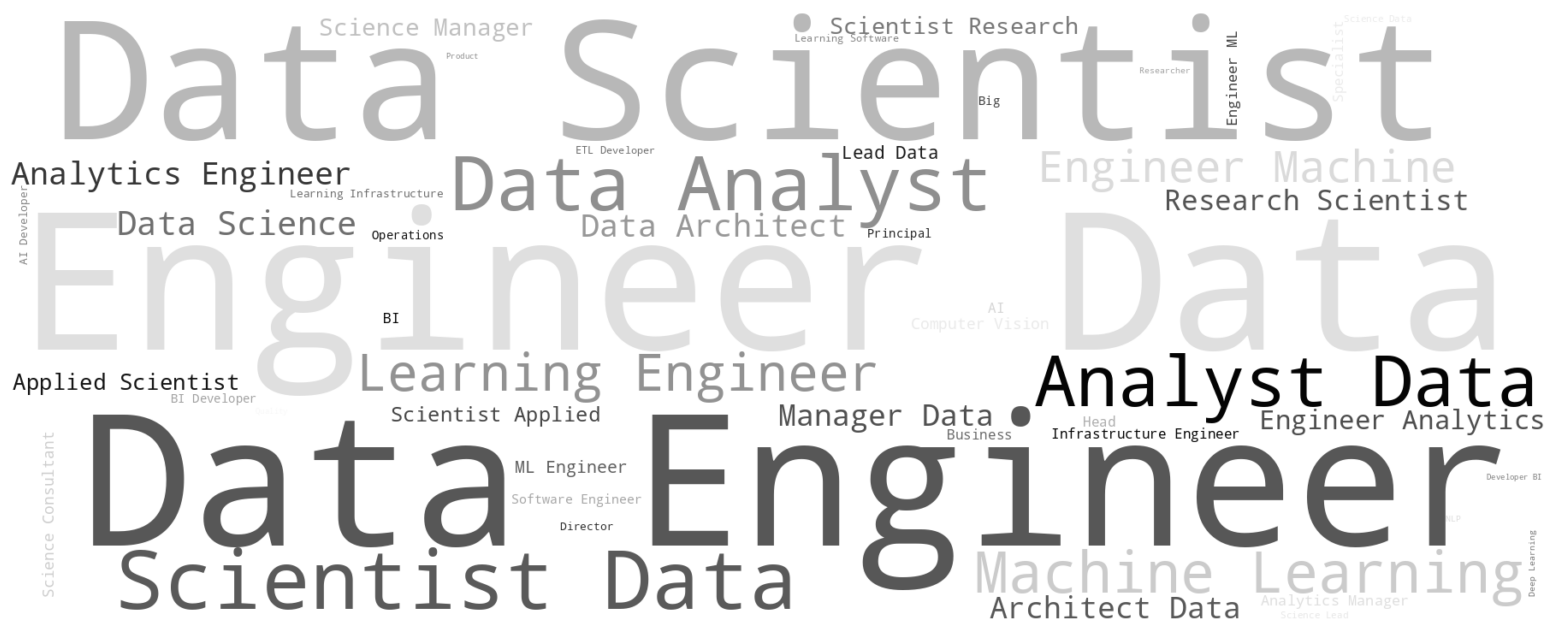

In [293]:
import matplotlib.colors as mcolors

# Cria a paleta de cores
cmap = mcolors.LinearSegmentedColormap.from_list('black_to_white', ['#000000', '#ffffff'])

palavras = df["job_title"].values

# Cria um objeto WordCloud com as palavras do array e a paleta de cores personalizada
nuvem_palavras = WordCloud(background_color='white', width=1800, height=720, colormap=cmap, max_words=50).generate(' '.join(palavras))

# Cria o gráfico
fig, ax = plt.subplots(figsize=(22, 8))
ax.imshow(nuvem_palavras, interpolation='bilinear')
ax.axis("off")
plt.show()


In [294]:
jobs_title = df["job_title"].value_counts().sort_values(ascending=False)

# top jobs
top_jobs_labels = jobs_title.index.values[:5].tolist()
top_jobs_values = jobs_title.values[:5].tolist()

# sum of total jobs registered
total = sum(jobs_title.values)

# sum of other jobs
others = sum(jobs_title.values[5:])

jobs_values = top_jobs_values + [others]
jobs_labels = top_jobs_labels + ["Others"]

jobs = dict(zip(jobs_labels, jobs_values))

# Ordenar o dicionário pelos valores em ordem crescente
jobs_ordered = dict(sorted(jobs.items(), key=lambda item: item[1], reverse=True))

# Cria um objeto Pie para o gráfico de donut
data = [
    go.Pie(
        labels=list(jobs_ordered.keys()),
        values=list(jobs_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Cria o layout do gráfico
layout = go.Layout(
    title={
        'text': "Top jobs of professionals in the data career",
        'x': 0.5,
        #'xanchor': 'center'
    },
    #width=700,
    #height=700,
    annotations=[annotation],
)

# Cria a figura do gráfico
fig = go.Figure(data=data, layout=layout)

fig.show()

### employee_residence

In [295]:
df["employee_residence"].value_counts(normalize=True).sort_values(ascending=False)[0:10]

employee_residence
US    0.800541
GB    0.044655
ES    0.021380
CA    0.021380
IN    0.018945
DE    0.012449
FR    0.010284
PT    0.004871
BR    0.004871
GR    0.004330
Name: proportion, dtype: float64

In [296]:
def country_to_continent(country_code):
    if not isinstance(country_code, str) or len(country_code) != 2:
        raise ValueError(
            "Input inválido. O código de país deve ser uma string com dois caracteres."
        )
    country_alpha2 = country_code
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    return country_continent_code


# Categorizar o país de cada cientista de dados e adicionar uma nova coluna ao DataFrame
def categorize_country(country_code):
    try:
        return pyc.countries.get(alpha_2=country_code).alpha_3
    except:
        return "Unknown"

In [297]:
# cria o dicionário de siglas e nomes por extenso
continentes = {
    "NA": "North America",
    "EU": "Europe",
    "AS": "Asia",
    "SA": "South America",
    "AF": "Africa",
    "OC": "Oceania",
}

df["employee_residence"].apply(country_to_continent).value_counts(
    normalize=True
).sort_values(ascending=False).rename(index=continentes)


employee_residence
North America    0.826793
Europe           0.124222
Asia             0.032206
South America    0.008931
Africa           0.004060
Oceania          0.003789
Name: proportion, dtype: float64

In [298]:
data = (
    df["employee_residence"]
    .apply(country_to_continent)
    .value_counts()
    .sort_values(ascending=False)
)


data.rename(continentes, inplace=True)

# counts of unique values
unique_values = data.value_counts()

# frequency of values and the labels
freq = data.values
labels = data.index.values

# sum of total experience levels
total = sum(freq)

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Criar o gráfico de rosca
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria o layout do gráfico
layout = go.Layout(
    title={
        "text": "Residance of professionals in the data career",
        "x": 0.5,
        # "xanchor": "center",
    },
    # width=700,
    # height=700,
    annotations=[annotation],
)

# Adicionar título
fig = go.Figure(data=data, layout=layout)

# Mostrar o gráfico
fig.show()


In [299]:
df["employee_residence"].apply(categorize_country).value_counts(
    normalize=True
).sort_values(ascending=False)


employee_residence
USA    0.800541
GBR    0.044655
ESP    0.021380
CAN    0.021380
IND    0.018945
         ...   
JEY    0.000271
LUX    0.000271
HND    0.000271
EST    0.000271
MLT    0.000271
Name: proportion, Length: 78, dtype: float64

In [300]:
from plotly import colors
list(reversed(colors.sequential.Greys))

['rgb(0,0,0)',
 'rgb(37,37,37)',
 'rgb(82,82,82)',
 'rgb(115,115,115)',
 'rgb(150,150,150)',
 'rgb(189,189,189)',
 'rgb(217,217,217)',
 'rgb(240,240,240)',
 'rgb(255,255,255)']

In [301]:
residence = (
    df["employee_residence"]
    .apply(categorize_country)
    .value_counts()
    .sort_values(ascending=False)
)[0:10]


# Criar o gráfico de barras
data = [
    go.Bar(
        x=residence.index,
        y=y,
        marker=dict(color=list(reversed(colors.sequential.Greys))),
        text=y,
        textposition="auto",
    )
]

# Criar o layout
layout = go.Layout(
    title={"text": "Top 10 employee locations", "x": 0.5},
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(title="Country"),
    yaxis=dict(title="Quantity of Employees"),
)

# Criar a figura e plotar o gráfico de barras
fig = go.Figure(data=data, layout=layout)
fig.show()


### company_location: The country of the employer's main office or contracting branch

In [302]:
df["company_location"].value_counts(normalize=True)

company_location
US    0.810284
GB    0.046008
CA    0.021922
ES    0.020568
IN    0.015426
        ...   
HK    0.000271
MK    0.000271
BA    0.000271
AM    0.000271
MT    0.000271
Name: proportion, Length: 72, dtype: float64

### company_size: The average number of people that worked for the company during the year

In [303]:
df["company_size"].unique()

array(['M', 'L', 'S'], dtype=object)

- S less than 50 employees (small)
- M 50 to 250 employees (medium)
- L more than 250 employees (large)

In [304]:
df["company_size"].value_counts(normalize=True)

company_size
M    0.840325
L    0.120162
S    0.039513
Name: proportion, dtype: float64

In [305]:
data = df["company_size"].replace(
    {"S": "Small company", "M": "Medium company", "L": "Large company"}
)

# counts of unique values
unique_values = data.value_counts()

# frequency of values and the labels
freq = unique_values.values
labels = unique_values.index.values
# cria o dicionário de siglas e nomes por extenso
continentes = {
    "NA": "North America",
    "EU": "Europe",
    "AS": "Asia",
    "SA": "South America",
    "AF": "Africa",
    "OC": "Oceania",
}
# sum of total experience levels
total = sum(freq)

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Criar o gráfico de rosca
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

layout = go.Layout(
    title={
        "text": "Size of companies with professionals in the data career",
        "x": 0.5,
    },
    annotations=[
        {
            "text": "Small company: fewer than 50 employees<br>"
            "Medium company: between 50 and 250 employees<br>"
            "Large company: more than 250 employees",
            "showarrow": False,
            "x": 1.15,
            "y": 0.03,
            "xref": "paper",
            "yref": "paper",
            "align": "right",
        },
        dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)
    ],
)

# Adicionar título
fig = go.Figure(data=data, layout=layout)

# Mostrar o gráfico
fig.show()

### salaray_currency: The currency of the salary paid

In [306]:
df["salary_currency"].value_counts(normalize=True)


salary_currency
USD    0.856834
EUR    0.063599
GBP    0.043572
INR    0.015968
CAD    0.006766
AUD    0.002436
SGD    0.001624
BRL    0.001624
PLN    0.001353
CHF    0.001083
HUF    0.000812
DKK    0.000812
JPY    0.000812
TRY    0.000812
THB    0.000541
ILS    0.000271
HKD    0.000271
CZK    0.000271
MXN    0.000271
CLP    0.000271
Name: proportion, dtype: float64

The predominant payment currencies are the Dollar and the Euro.

In [307]:
salary_currency = df["salary_currency"].value_counts()

# top currency
top_currencies_labels = salary_currency.index.values[:2].tolist()
top_currencies_values = salary_currency.values[:2].tolist()

# sum of total jobs registered
total = sum(salary_currency.values)

# sum of other jobs
others = sum(salary_currency.values[2:])

currency_values = top_currencies_values + [others]
currency_labels = top_currencies_labels + ["Others"]

currencies = dict(zip(currency_labels, currency_values))

# Ordenar o dicionário pelos valores em ordem crescente
currencies_ordered = dict(sorted(currencies.items(), key=lambda item: item[1], reverse=True))

# Cria um objeto Pie para o gráfico de donut
data = [
    go.Pie(
        labels=list(currencies_ordered.keys()),
        values=list(currencies_ordered.values()),
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Cria o layout do gráfico
layout = go.Layout(
    title={
        'text': "Top currencies of professionals in the data career",
        'x': 0.5,
        'xanchor': 'center'
    },
    #width=600,
    #height=600,
    annotations=[annotation],
)

# Cria a figura do gráfico
fig = go.Figure(data=data, layout=layout)

fig.show()

## Numerical Attributes

### work_year: The year of the salary was paid

In [308]:
# description of frequency work_year attribute
work_year = df["work_year"].value_counts().sort_index()

# The Years of salary was paid
years = work_year.index.values

# Sample
quantity_of_employeements = work_year.values

# Growth percentage array
growth_percentage = (
    100 * (np.diff(quantity_of_employeements)) / quantity_of_employeements[:-1]
)

growth_percentage = np.concatenate(([0], growth_percentage))


# Create a figure with layout configuration
fig = make_subplots(rows=1, cols=2)

# Quantity bar graph
fig.add_trace(
    go.Bar(
        x=years,
        y=quantity_of_employeements,
        name="Quantity",
        text=quantity_of_employeements,
        textposition="auto",
    ),
    row=1,
    col=1,
)

# Growth scatter graph
fig.add_trace(
    go.Scatter(
        x=years,
        y=np.round(growth_percentage, 0),
        name="Growth",
        mode="lines+markers+text",
        text=np.char.mod("%.0f", growth_percentage),
        textposition="top center",
        textfont=dict(size=12),
        hoverinfo="y+text",
    ),
    row=1,
    col=2,
)

# Layout configuration
fig.update_layout(
    title="Salaries registered in <a href='https://ai-jobs.net'>ai-jobs.net</a> per Year",
    xaxis_title="Years",
    yaxis1_title="Quantity",
    yaxis2_title="Growth (%)",
)
fig.update_layout(template=None)

# Change color to black
fig.update_traces(marker=dict(color="black"))
# height=400, width=800)

fig.show()

<p style='text-align: justify;'> The highest number of records of professionals in the data career occurred in 2022 so far, but the difference between the current year and the previous one has been narrowing more and more, so we should have more salaries registered compared to last year. An exponential growth in salary records on the platform is observed, the data community is increasingly adopting the use of the platform, engaged in registering their salaries on it, thus the number of records keeps increasing. </p>

<p style='text-align: justify;'> Over time, ai-jobs.net can serve as a sample to analyze the demand curve for data professionals. At this moment, we cannot assume that the demand for data professionals is increasing, as the increase in 2022 may have been due to the platform's promotion in the community and not necessarily due to an increase in demand for professionals. </p>

### salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year via data from BIS).
While the attribute salary represents the value in local currency, the attribute salary_in_usd represents the converted value in US dollars. To facilitate analysis, we will adopt only the salary in US dollars.

In [309]:
# array dos valores de salarios registrados
salary = df["salary_in_usd"].values

# Calculando a curva de densidade
kde = gaussian_kde(salary)
x_kde = np.linspace(0, salary.max(), 100)
y_kde = kde.evaluate(x_kde)

# Calculate mean, median and mode
mean_salary = np.mean(salary)
median_salary = np.median(salary)
values, counts = np.unique(salary, return_counts=True)
mode_salary = values[np.argmax(counts)]

# Valores de densidade da curva KDE
density_at_mean = kde.evaluate(mean_salary)
density_at_median = kde.evaluate(median_salary)
density_at_mode = kde.evaluate(mode_salary)

# Criação do objeto de figuras com subplots
fig = make_subplots(rows=1, cols=2)

# Adição do boxplot no primeiro subplot
fig.add_trace(go.Box(x=salary), row=1, col=1)

# Adição do gráfico de densidade no segundo subplot
fig.add_trace(go.Scatter(x=x_kde, y=y_kde), row=1, col=2)

# Personalização do layout da figura
fig.update_layout(
    title="Salary of professionais in data carrer",
    xaxis=dict(title="Salário"),
    yaxis=dict(title="Densidade"),
    showlegend=False,
    template=None,
)


# Exibição da figura
fig.show()


A distribution with positive skewness is a probability distribution where the right tail is longer than the left tail. This means that most of the values are concentrated on the left side of the graph, while a smaller number of values extend to the right. The mean is higher than the median and mode, indicating the presence of extreme values in the right tail of the distribution.

A common example of a distribution with positive skewness is the salary distribution, where a large number of people earn low salaries, while a smaller number of people earn very high salaries, pulling the mean upwards.

### remote_ratio: The overall amount of work done remotely, possible values are as follows: 

In [310]:
df["remote_ratio"].unique()

array([100,   0,  50])

- 0: No remote work (less than 20%)
- 50: Partially remote
- 100: Fully remote (more than 80%)

In [311]:
df["remote_ratio"].value_counts(normalize=True)

remote_ratio
0      0.51069
100    0.43843
50     0.05088
Name: proportion, dtype: float64

In [312]:
data = df["remote_ratio"].replace(
    {0: "No remote work", 50: "Partially remote", 100: "Fully remote"}
)

# counts of unique values
unique_values = data.value_counts()

# frequency of values and the labels
freq = unique_values.values
labels = unique_values.index.values

# sum of total experience levels
total = sum(freq)

# Cria a anotação com o valor total
annotation = dict(font=dict(size=20), showarrow=False, text=str(total), x=0.5, y=0.5)

# Criar o gráfico de rosca
data = [
    go.Pie(
        labels=labels,
        values=freq,
        hole=0.5,
        marker=dict(colors=list(reversed(colors.sequential.Greys))),
        textinfo="percent+label",
        insidetextorientation="auto",
        hoverinfo="label+value",
    )
]

# Cria o layout do gráfico
layout = go.Layout(
    title={
        "text": "Tof professionals in the data career",
        "x": 0.5,
        # "xanchor": "center",
    },
    # width=700,
    # height=700,
    annotations=[annotation],
)

# Adicionar título
fig = go.Figure(data=data, layout=layout)

# Mostrar o gráfico
fig.show()

# Bivariate analysis

## Categorical & Categorical

### Hypothesis test
Used to assess the plausibility of a hypothesis by using sample data

In [323]:
class HypothesisTest:
    def __init__(self, df) -> None:
        self._df = df

    def t_test(self, var1: str, var2: str, h0: str, alpha=0.05) -> dict:
        """
        Performs a t-test for two numerical variables in a DataFrame.

        Parameters:
        var1 (str): The name of the first numerical variable.
        var2 (str): The name of the second numerical variable.
        hypothesis (str): user's hypothesis in the form of a string, e.g. "The mean is equal to 5"
        alpha (float, optional): The desired significance level for the test. Defaults to 0.05.

        Returns:
        dict: A dictionary containing the following fields:
            - "t": The t-statistic calculated by the test.
            - "p_value": The p-value calculated by the test.
            - "conclusion": the result of the test, indicating whether the null hypothesis was rejected or not.
        """

        df = self._df

        # Calculates the t-statistic and p-value for the t-test
        t_stat, p_val = ttest_ind(df[var1], df[var2])

        # Determine conclusion
        if p_val < alpha:
            conclusion = f"Reject null hypothesis: {h0}"
        else:
            conclusion = f"Fail to reject null hypothesis: {h0}"

        # Returns a dictionary with the results of the test
        return {"t": t_stat, "p_value": p_val, "conclusion": conclusion}

    def chi_square_test(self, var1: str, var2: str, h0: str, alpha=0.05) -> dict:
        """
        Performs the chi-square test for two categorical variables of a DataFrame.

        Parameters:
            var1 (str): name of the first categorical variable.
            var2 (str): name of the second categorical variable.
            hypothesis (str): user's hypothesis in the form of a string, e.g. "The mean is equal to 5"
            alpha (float): desired significance level for the test (usually 0.05 or 0.01).

        Returns:
            A dictionary with the following fields:
            - "chi2": the calculated chi-square value.
            - "p_value": the p-value calculated by the test.
            - "conclusion": the result of the test, indicating whether the null hypothesis was rejected or not.
        """

        df = self._df

        # Creates a contingency table
        contingency_table = pd.crosstab(df[var1], df[var2])

        # Performs the chi-squared test
        chi2, p_val, _, _ = chi2_contingency(contingency_table)

        # Determine conclusion
        if p_val < alpha:
            conclusion = f"Reject null hypothesis: {h0}"
        else:
            conclusion = f"Fail to reject null hypothesis: {h0}"

        # Returns a dictionary with the results of the test
        return {"chi²": chi2, "p_value": p_val, "conclusion": conclusion}


#### Example of Hypothesis test between categorical variables

#### Example of Hypothesis test between numerical variables

In [325]:
hypothesis = HypothesisTest(numerical_df)

hypothesis.t_test(
    "work_year",
    "remote_ratio",
    "There is no significant difference between the years of salary registration on the platform and their mode of work as in-person, remote or hybrid.",
)


{'t': 2472.028135278793,
 'p_value': 0.0,
 'conclusion': 'Reject null hypothesis: There is no significant difference between the years of salary registration on the platform and their mode of work as in-person, remote or hybrid.'}

In [315]:
hypothesis = HypothesisTest(numerical_df)

hypothesis.t_test("remote_ratio", "salary_in_usd")


{'t': -132.56984953764186,
 'p_value': 0.0,
 'pearson_correlation': -0.06244434926170026,
 'pearson_p_value': 0.0001457526091054999,
 'result': 'There is a weak or non-existent correlation between the variables.'}

In [318]:
hypothesis = HypothesisTest(numerical_df)

hypothesis.t_test("salary", "salary_in_usd")


{'t': 4.7900673232876585,
 'p_value': 1.6997499684615514e-06,
 'pearson_correlation': -0.024290765677597505,
 'pearson_p_value': 0.1398716575664912,
 'result': 'There is a weak or non-existent correlation between the variables.'}

#### Example of Hypothesis test between categorical and numerical variables

In [ ]:
hypothesis = HypothesisTest(numerical_df)

hypothesis.t_test("work_year", "salary_in_usd")


{'t': -130.65983938075553,
 'p_value': 0.0,
 'pearson_correlation': 0.22604311494807844,
 'pearson_p_value': 5.049402647386091e-44,
 'result': 'There is a weak or non-existent correlation between the variables.'}

In [ ]:
class Correlation:
    def __init__(self, df: pd.DataFrame) -> None:
        self._df = df

    @property
    def df(self) -> pd.DataFrame:
        return self._df

    


In [ ]:
chi2_test(categorical_df, "experience_level", "company_size")

{'chi²': 323.11326949283045,
 'p_value': 9.074879224638488e-67,
 'result': 'rejeitada'}

In [ ]:
categorical_df.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
categorical_columns = categorical_df.columns.values

bivariate_categorical_combinations = list(
    itertools.combinations(categorical_columns, 2)
)

bivariate_categorical_combinations

[('experience_level', 'employment_type'),
 ('experience_level', 'job_title'),
 ('experience_level', 'salary_currency'),
 ('experience_level', 'employee_residence'),
 ('experience_level', 'company_location'),
 ('experience_level', 'company_size'),
 ('employment_type', 'job_title'),
 ('employment_type', 'salary_currency'),
 ('employment_type', 'employee_residence'),
 ('employment_type', 'company_location'),
 ('employment_type', 'company_size'),
 ('job_title', 'salary_currency'),
 ('job_title', 'employee_residence'),
 ('job_title', 'company_location'),
 ('job_title', 'company_size'),
 ('salary_currency', 'employee_residence'),
 ('salary_currency', 'company_location'),
 ('salary_currency', 'company_size'),
 ('employee_residence', 'company_location'),
 ('employee_residence', 'company_size'),
 ('company_location', 'company_size')]

Attributes such as salary_currency and employment_type may be disregarded in pairwise analysis of categorical variables, as they exhibit a very dominant distribution, as seen in the univariate analysis. The dominant currency is the dollar and the majority of data professionals work full-time. 

When the distribution of an attribute is dominant compared to other values, it may affect the pairwise analysis of categorical variables, as the variable may not exhibit sufficient variation to be considered relevant in the analysis. In the specific case of attributes salary_currency and employment_type, if they exhibit a very dominant distribution, it is possible that they may not bring much relevant information for the pairwise analysis of categorical variables. 

It is important to remember that the decision to disregard an attribute or not depends on the context and objective of the analysis. In some cases, even if the distribution of an attribute is dominant, it may still bring relevant information for the analysis.

### Job Title bivariate analysis

In [ ]:
[
    variable_for_analysis
    for variable_for_analysis in bivariate_categorical_combinations
    if "job_title" in variable_for_analysis
]

[('experience_level', 'job_title'),
 ('employment_type', 'job_title'),
 ('job_title', 'salary_currency'),
 ('job_title', 'employee_residence'),
 ('job_title', 'company_location'),
 ('job_title', 'company_size')]

Since the distribution of the job_title attribute is considerable, I will adopt only three categories: Data Engineer, Data Scientist, and Data Analyst.

In [ ]:
job_title_bivariate_analysis = categorical_df.loc[
    categorical_df["job_title"].isin(
        ["Data Engineer", "Data Scientist", "Data Analyst"]
    )
]
job_title_bivariate_analysis

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Data Engineer,USD,US,US,M
1,SE,FT,Data Engineer,USD,US,US,M
2,SE,FT,Data Scientist,USD,US,US,M
3,SE,FT,Data Scientist,USD,US,US,M
4,SE,FT,Data Engineer,USD,US,US,M
...,...,...,...,...,...,...,...
3683,MI,FT,Data Engineer,USD,ES,US,M
3686,MI,FT,Data Scientist,SGD,SG,IL,M
3688,MI,FT,Data Engineer,EUR,MT,MT,L
3690,SE,FT,Data Scientist,USD,US,US,L


#### Experince Level

In [ ]:
df_copy = job_title_bivariate_analysis.copy()


grouped_data = (
    df_copy.replace(
        {
            "SE": "Senior",
            "MI": "Intermediate",
            "EN": "Junior",
            "EX": "Director",
        }
    )
    .groupby(["job_title", "experience_level"])["experience_level"]
    .count()
    .reset_index(name="count")
)

fig = go.Figure()

traces = [
    go.Bar(
        x=grouped_data[grouped_data["experience_level"] == experience_level][
            "job_title"
        ],
        y=grouped_data[grouped_data["experience_level"] == experience_level]["count"],
        name=experience_level,
    )
    for experience_level in grouped_data["experience_level"].unique()
]

# Criando o layout do gráfico
layout = go.Layout(
    title="Experience Level by Job Title",
    xaxis=dict(title="Job Title"),
    yaxis=dict(title="Count"),
)

# Adicionando as barras ao objeto Figure
fig = go.Figure(data=traces, layout=layout)

fig.show()

#### Employee Type

#### Salary Currency

#### Employee Residence

In [ ]:
df_copy = job_title_bivariate_analysis.copy()

df_copy.loc[df_copy["employee_residence"] != "US", "employee_residence"] = "Others"

stacked_data = (
    df_copy.replace({"US": "USA"})
    .groupby(["job_title", "employee_residence"])["employee_residence"]
    .count()
    .reset_index(name="count")
)

fig = go.Figure()

# Criando as barras para "Others"
trace1 = go.Bar(
    x=stacked_data[stacked_data["employee_residence"] == "Others"]["job_title"],
    y=stacked_data[stacked_data["employee_residence"] == "Others"]["count"],
    name="Others",
)

# Criando as barras para os EUA
trace2 = go.Bar(
    x=stacked_data[stacked_data["employee_residence"] == "USA"]["job_title"],
    y=stacked_data[stacked_data["employee_residence"] == "USA"]["count"],
    name="USA",
)

# Criando o layout do gráfico
layout = go.Layout(
    title="Employee Residence by Job Title",
    xaxis=dict(title="Job Title"),
    yaxis=dict(title="Count"),
)

# Adicionando as barras ao objeto Figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()

#### Company Location

In [ ]:
df_copy = job_title_bivariate_analysis.copy()

df_copy.loc[df_copy["company_location"] != "US", "company_location"] = "Others"

stacked_data = (
    df_copy.replace({"US": "USA"})
    .groupby(["job_title", "company_location"])["company_location"]
    .count()
    .reset_index(name="count")
)

fig = go.Figure()

# Criando as barras para "Others"
trace1 = go.Bar(
    x=stacked_data[stacked_data["company_location"] == "Others"]["job_title"],
    y=stacked_data[stacked_data["company_location"] == "Others"]["count"],
    name="Others",
)

# Criando as barras para os EUA
trace2 = go.Bar(
    x=stacked_data[stacked_data["company_location"] == "USA"]["job_title"],
    y=stacked_data[stacked_data["company_location"] == "USA"]["count"],
    name="USA",
)

# Criando o layout do gráfico
layout = go.Layout(
    title="Company Location by Job Title",
    xaxis=dict(title="Job Title"),
    yaxis=dict(title="Count"),
)

# Adicionando as barras ao objeto Figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

fig.show()

#### Company Size

In [ ]:
df_copy = job_title_bivariate_analysis.copy()


grouped_data = (
    df_copy.groupby(["job_title", "company_size"])["company_size"]
    .count()
    .reset_index(name="count")
)


fig = go.Figure()

# Criando as barras para small company
small_company = go.Bar(
    x=grouped_data[grouped_data["company_size"] == "S"][
        "job_title"
    ],
    y=grouped_data[grouped_data["company_size"] == "S"]["count"],
    name="Small Company (less than 50 employees)",
)

# Criando as barras para os EUA
medium_company = go.Bar(
    x=grouped_data[grouped_data["company_size"] == "M"]["job_title"],
    y=grouped_data[grouped_data["company_size"] == "M"]["count"],
    name="Medium Company (50 to 250 employees)",
)

# Criando as barras para os EUA
large_company = go.Bar(
    x=grouped_data[grouped_data["company_size"] == "L"][
        "job_title"
    ],
    y=grouped_data[grouped_data["company_size"] == "L"]["count"],
    name="Large Company (more than 250)",
)

# Criando o layout do gráfico
layout = go.Layout(
    title="Company Size by Job Title",
    xaxis=dict(title="Job Title"),
    yaxis=dict(title="Count"),
)

# Adicionando as barras ao objeto Figure
fig = go.Figure(data=[small_company, medium_company, large_company], layout=layout)

fig.show()

### Company Size bivariate analysis

In [ ]:
[
    variable_for_analysis
    for variable_for_analysis in bivariate_categorical_combinations
    if "company_size" in variable_for_analysis
]

[('experience_level', 'company_size'),
 ('employment_type', 'company_size'),
 ('job_title', 'company_size'),
 ('salary_currency', 'company_size'),
 ('employee_residence', 'company_size'),
 ('company_location', 'company_size')]

In [ ]:
company_size_bivariate_analysis = categorical_df.loc[
    categorical_df["company_size"].isin(
        ["Data Engineer", "Data Scientist", "Data Analyst"]
    )
]
job_title_bivariate_analysis

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Data Engineer,USD,US,US,M
1,SE,FT,Data Engineer,USD,US,US,M
2,SE,FT,Data Scientist,USD,US,US,M
3,SE,FT,Data Scientist,USD,US,US,M
4,SE,FT,Data Engineer,USD,US,US,M
...,...,...,...,...,...,...,...
3683,MI,FT,Data Engineer,USD,ES,US,M
3686,MI,FT,Data Scientist,SGD,SG,IL,M
3688,MI,FT,Data Engineer,EUR,MT,MT,L
3690,SE,FT,Data Scientist,USD,US,US,L


#### Experience Level

In [ ]:
grouped_data = (
    df.groupby(["company_size", "experience_level"])["experience_level"]
    .count()
    .reset_index(name="count")
)

fig = go.Figure()

traces = [
    go.Bar(
        x=grouped_data[grouped_data["experience_level"] == experience_level][
            "company_size"
        ],
        y=grouped_data[grouped_data["experience_level"] == experience_level]["count"],
        name=experience_level,
    )
    for experience_level in grouped_data["experience_level"].unique()
]

# Criando o layout do gráfico
layout = go.Layout(
    title="Experience Level by Company Size",
    xaxis=dict(title="Job Title"),
    yaxis=dict(title="Count"),
)

# Adicionando as barras ao objeto Figure
fig = go.Figure(data=traces, layout=layout)

fig.show()

## Numerical & Numerical

## Numerical & Categorical

## Hypotesis test

Profissionais mais experientes trabalham em empresas maiores?

In [ ]:
df["salary"]

0        231500
1        166000
2        172500
3        110500
4        238000
         ...   
3690     412000
3691     151000
3692     105000
3693     100000
3694    7000000
Name: salary, Length: 3695, dtype: int64

In [ ]:
categorical_df.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

### Trend Salary [USD] per top job_title

In [ ]:
trend_salary = df.loc[
    df["job_title"].isin(["Data Engineer", "Data Scientist", "Data Analyst"])
]

trend_salary = trend_salary.loc[:, ["work_year", "job_title", "salary_in_usd"]]

# agrupar por percentil e calcular a média do salário
grouped = trend_salary.groupby(["work_year", "job_title"]).quantile(0.95)

grouped.reset_index(inplace=True)

# new figure
fig = go.Figure()

for job_title in grouped["job_title"].unique():
    data = grouped[grouped["job_title"] == job_title]
    fig.add_trace(
        go.Scatter(
            x=data["work_year"], y=data["salary_in_usd"], mode="lines", name=job_title
        )
    )

# Definir os limites e intervalo do eixo x
fig.update_layout(xaxis=dict(range=[2019.5, 2023.5], dtick=1), template=None)

# Exibir o gráfico
fig.show()


In [ ]:
pd.get_dummies(df)

,work_year,salary,salary_in_usd,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2023,231500,231500,100,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2023,166000,166000,100,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,2023,172500,172500,100,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,2023,110500,110500,100,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2023,238000,238000,0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,2020,412000,412000,100,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
3691,2021,151000,151000,100,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3692,2020,105000,105000,100,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3693,2020,100000,100000,100,True,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False


# Multivariate analysis
Multivariate analysis is used to understand how various independent variables are related to the dependent variable, allowing us to predict or explain the value of the dependent variable based on the independent variables. The choice of the response variable depends on the analysis objectives and the nature of the data. Generally, the response variable is the variable of greatest interest and the one we want to explain or predict.

In our case, the dependent variable will be the professional's salary in dollars in the data career. Do our independent attributes explain these records? Let's find out.

## Correlation analysis

In [ ]:
df_copy = df.copy()

# Selecionar as colunas categóricas
colunas_categoricas = df_copy.select_dtypes(include=["object"]).columns

# Aplicar factorize em cada coluna categórica
for coluna in colunas_categoricas:
    df_copy[coluna], _ = pd.factorize(df_copy[coluna])

# Calcule a matriz de correlação entre todos os atributos numéricos e "salario"
corr_matrix = df_copy.corr(method="spearman")["salary_in_usd"].sort_values(ascending=True)
corr_matrix

employee_residence   -0.502079
company_location     -0.488606
salary_currency      -0.483817
experience_level     -0.357635
company_size         -0.221935
employment_type      -0.116894
job_title            -0.110700
remote_ratio         -0.061479
work_year             0.208408
salary                0.883543
salary_in_usd         1.000000
Name: salary_in_usd, dtype: float64

In [ ]:
# Create bar plot
fig = go.Figure(
    go.Bar(
        x=corr_matrix.values,
        y=corr_matrix.index,
        orientation="h",
        marker=dict(
            color=corr_matrix.values,
            colorscale="Greys",
            colorbar=dict(title="Correlation"),
            cmin=-1,
            cmax=1,
        ),
    )
)

# Configure layout
fig.update_layout(
    title="Correlation of Salary (USD) with other features",
    xaxis_title="Correlation",
    #yaxis_title="Features",
    template=None,
    margin=dict(l=130)
)
# Show figure
fig.show()

There is a weak positive correlation between the variables "work_year", "experience_level", and "company_size". It is interesting to note that regardless of the professional's level of experience and the size of the company, they justify the salary paid (+), but not highly correlated, which may seem illogical (causality). One hypothesis that can be attributed to the result is the demand for these professionals in the job market.

On the negative side, the variables "company_location" and "employee_residence" stand out with a negative correlation. Interpreting it, one can say that the location of the professional and the company does not matter that much. This is justified by the high distribution between remote and on-site jobs (50/50).

## Regression Analysis

In [ ]:
import pandas as pd


data = df.copy()

# Selecionar as colunas categóricas
colunas_categoricas = data.select_dtypes(include=["object"]).columns

# Aplicar factorize em cada coluna categórica
for coluna in colunas_categoricas:
    data[coluna], _ = pd.factorize(data[coluna])


# Define a variável dependente e as independentes
y = data["salary_in_usd"]
X = data.drop("salary_in_usd", axis=1)

# Adiciona a constante
X = sm.add_constant(X)

# Ajusta o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprime os resultados
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     102.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.27e-188
Time:                        17:41:37   Log-Likelihood:                -45615.
No. Observations:                3695   AIC:                         9.125e+04
Df Residuals:                    3684   BIC:                         9.132e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.467e+07   3.08e+06     -4.767      0.000   -2.07e+07   -8.64e+06
work_year           7327.5641   1521.174      4.817      0.000    4345.138    1.03e+04
experience_level   -1.043e+04   1245.766     -8.373      0.000   -1.29e+04   -7987.851
employment_type    -3978.6563   4721.911     -0.843      0.400   -1.32e+04    5279.162
job_title             41.9804     63.090      0.665      0.506     -81.715     165.676
salary                 0.0102      0.001      7.100      0.000       0.007       0.013
salary_currency    -9425.3206    599.239    -15.729      0.000   -1.06e+04   -8250.448
employee_residence  -642.1562    163.330     -3.932      0.000    -962.382    -321.930
remote_ratio          -5.5749     19.488     -0.286      0.775     -43.783      32.634
company_location    -597.0072    178.672     -3.341      0.001    -947.313    -246.702
company_size       -4774.7100   2222.834     -2.148      0.032   -9132.815    -416.605
==============================================================================
Omnibus:                      678.601   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1583.182
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       5.451   Cond. No.                     2.36e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 - R-squared: The coefficient of determination is a measure of how well the regression model fits the data. In this case, the R-squared value of 0.185 indicates that 18.5% of the variation in the dependent variable (salary_in_usd) is explained by the independent variables.

 - Adjusted R-squared: This is the same as R-squared, but adjusted for the number of independent variables in the model. The adjusted R-squared value of 0.182 indicates that the model still explains 18.2% of the variation in the dependent variable, even after accounting for the number of independent variables.

 - F-statistic: This is a measure of how well the overall model fits the data. In this case, the F-statistic of 82.98 indicates that the model is a good fit for the data, with a very low probability (2.09e-154) of getting such a result by chance.

 - P-values: These indicate the statistical significance of the coefficients for each independent variable. In this case, all variables except job_title, remote_ratio, and company_size have p-values less than 0.05, indicating that they are statistically significant and have a meaningful impact on the dependent variable.

 - Coefficients: These represent the estimated change in the dependent variable for a one-unit change in the independent variable, holding all other independent variables constant. For example, the coefficient for work_year is 1.097e+04, which means that for every additional year, the predicted salary_in_usd increases by approximately $10,970, holding all other variables constant.

 - Standard errors: These indicate the precision of the coefficient estimates. In general, smaller standard errors indicate more precise estimates.

 - Omnibus test: This is a test of whether the residuals (the difference between the predicted and actual values of the dependent variable) are normally distributed. In this case, the probability value is very low (p < 0.001), indicating that the residuals are not normally distributed.

 - Durbin-Watson test: This is a test for autocorrelation in the residuals. In this case, the value of 1.839 indicates that there is a moderate positive autocorrelation.

 - Jarque-Bera test: This is a test of whether the residuals are normally distributed, based on measures of skewness and kurtosis. In this case, the probability value is very low (p < 0.001), indicating that the residuals are not normally distributed.

 - Condition number: This is a measure of the amount of multicollinearity (correlation between independent variables) in the model. In this case, the large value of 2.26e+09 indicates that there may be strong multicollinearity between some of the independent variables.

# Feature Engineering

O objetivo desse capitulo é demonstrar alguma tecnica de engenharia de variaveis para aplicar ao modelo dos dados. Nesse caso irei realizei um modelo de NLP que consegue classificar com certo grau de precisao as profissoes reportadas e classificar em categorias, assim termos uma nova variavel de entrada por exemplo

## NLP data job classification
O objetivo é classificar a descricao do trabalho registrado em 4 grandes areas: Cientista de Dados, Engenhenheiros de Dados, Analista de Dados e Engenheiro de Inteligencia Artifical

In [ ]:
def text_to_lower(text: str) -> str:
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    return text

In [ ]:
jobs = df["job_title"].values
jobs = [text_to_lower(job) for job in jobs]

# Vetoriza os títulos utilizando o TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(jobs)
vectorizer.get_feature_names_out()

array(['3d', 'ai', 'analyst', 'analytics', 'applied', 'architect',
       'autonomous', 'azure', 'bi', 'big', 'business', 'cloud',
       'computer', 'consultant', 'data', 'database', 'deep', 'developer',
       'devops', 'director', 'engineer', 'etl', 'finance', 'financial',
       'head', 'infrastructure', 'insight', 'intelligence', 'lead',
       'learning', 'machine', 'management', 'manager', 'marketing', 'ml',
       'mlops', 'nlp', 'operations', 'power', 'principal', 'product',
       'programmer', 'quality', 'research', 'researcher', 'science',
       'scientist', 'software', 'specialist', 'staff', 'tech',
       'technician', 'vehicle', 'vision'], dtype=object)

In [ ]:
# Define o dicionário de mapeamento de valores numéricos para nomes de rótulos
job_roles = {
    0: "data scientist",
    1: "data analyst",
    2: "machine learning engineer",
    3: "data engineer",
}

# Executa o k-means com k=4
kmeans = KMeans(n_clusters=len(job_roles), random_state=0, n_init=10).fit(X)

# Cria um DataFrame com os títulos e os grupos atribuídos pelo KMeans
job_title_classificator_df = pd.DataFrame(
    {"job_title": jobs, "job_role": kmeans.labels_}
)


# Substitui os valores numéricos pelos nomes de rótulos no DataFrame
job_title_classificator_df = job_title_classificator_df.replace({"job_role": job_roles})

# Imprime o DataFrame com os títulos, grupos e rótulos
job_title_classificator_df


,job_title,job_role
0,data engineer,data analyst
1,data engineer,data analyst
2,data scientist,machine learning engineer
3,data scientist,machine learning engineer
4,data engineer,data analyst
...,...,...
3690,data scientist,machine learning engineer
3691,principal data scientist,machine learning engineer
3692,data scientist,machine learning engineer
3693,business data analyst,data engineer


In [ ]:
for job_role in list(job_roles.values()):
    print(job_role)
    print(
        job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == job_role
        ]["job_title"].unique()
    )
    print("\n")


data scientist
['machine learning engineer' 'applied machine learning engineer'
 'machine learning researcher' 'machine learning scientist'
 'applied machine learning scientist' 'deep learning researcher'
 'machine learning infrastructure engineer' 'deep learning engineer'
 'machine learning software engineer' 'machine learning research engineer'
 'machine learning developer' 'principal machine learning engineer'
 'machine learning manager' 'lead machine learning engineer'
 'head of machine learning']


data analyst
['data engineer' 'computer vision engineer' 'data architect'
 'ai developer' 'business intelligence engineer' 'analytics engineer'
 'research engineer' 'data analytics manager' 'etl engineer'
 'data devops engineer' 'head of data' 'data science manager'
 'data manager' 'big data engineer' 'data specialist' 'bi data engineer'
 'director of data science' 'mlops engineer'
 'autonomous vehicle technician' 'cloud database engineer'
 'data infrastructure engineer' 'ml engineer' '

In [ ]:
# Reduce the dimensionality of the data to 2 principal components using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

X_pca

array([[-0.5593415 , -0.20776643],
       [-0.5593415 , -0.20776643],
       [ 0.62815907, -0.37582695],
       ...,
       [ 0.62815907, -0.37582695],
       [ 0.10589541,  0.41095934],
       [ 0.06352783,  0.11329695]])

In [ ]:
# Create a DataFrame with job titles, groups, and principal component coordinates
job_title_classificator_df["pc1"] = X_pca[:, 0]
job_title_classificator_df["pc2"] = X_pca[:, 1]

job_title_classificator_df


,job_title,job_role,pc1,pc2
0,data engineer,data analyst,-0.559341,-0.207766
1,data engineer,data analyst,-0.559341,-0.207766
2,data scientist,machine learning engineer,0.628159,-0.375827
3,data scientist,machine learning engineer,0.628159,-0.375827
4,data engineer,data analyst,-0.559341,-0.207766
...,...,...,...,...
3690,data scientist,machine learning engineer,0.628159,-0.375827
3691,principal data scientist,machine learning engineer,0.272369,-0.065812
3692,data scientist,machine learning engineer,0.628159,-0.375827
3693,business data analyst,data engineer,0.105895,0.410959


In [ ]:
# Define a escala de cinza
colorscale = [(i / len(job_roles), f"rgb({i}, {i}, {i})") for i in range(256)]


traces = [
    go.Scatter(
        x=job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == role
        ]["pc2"].values,
        y=job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == role
        ]["pc1"].values,
        mode="markers",
        marker=dict(size=11, color=colorscale[int(i / len(job_roles) * 255)][1]),
        name=role,
        text=job_title_classificator_df.loc[
            job_title_classificator_df["job_role"] == role
        ]["job_title"],
        hoverinfo="text",
    )
    for i, role in job_roles.items()
]

# Define the layout
layout = go.Layout(
    title="Job Titles Clustered by Job Role",
    xaxis=dict(title="Principal Component 1"),
    yaxis=dict(title="Principal Component 2"),
    showlegend=True,
    plot_bgcolor="rgba(0,0,0,0)",
    legend=dict(title="Job Role"),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


Os pontos extremos são regisros que contém o mesmo nome do cluster de origem, importante reparar que os engenheiros de inteligencia artificial e de dados ficam com seu centro de cluster bem proximos, isto por que, há similiaridade na palavra engineer. Títulos de vagas que ficam proximos ao cluster de cientista de dados pois a similiaridade acontece na palavra "scientist"

# Conclusions
O principal objetivo desse trabalho é promover o conhecimento aprendido em sala de aula durante a disciiplna de Ciencia de Dados